<a href="https://colab.research.google.com/github/saisha-l/carbonEmissionsDataAnalysis/blob/main/Transportation_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import everything
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
import io
from google.colab import files


In [ ]:
# upload all data sets

from google.colab import files
uploaded = files.upload()


Saving co2-emissions-transport.csv to co2-emissions-transport (3).csv


In [ ]:
import io
transport = pd.read_csv(io.BytesIO(uploaded['co2-emissions-transport (3).csv']))
transport.head()

,Entity,Code,Year,Carbon dioxide emissions from transport
0,Afghanistan,AFG,1990,980000.0
1,Afghanistan,AFG,1991,930000.0
2,Afghanistan,AFG,1992,740000.0
3,Afghanistan,AFG,1993,740000.0
4,Afghanistan,AFG,1994,730000.0


In [ ]:
# prompt: how to delete all data that is before year 2000

# Assuming the year column is named 'Year'
transport = transport[transport['Year'] >= 2000]
transport.head()

US = transport[transport['Code'] =="USA"]
US.head()

,Entity,Code,Year,Carbon dioxide emissions from transport
5897,United States,USA,2000,1.717850e+09
5898,United States,USA,2001,1.720040e+09
5899,United States,USA,2002,1.741640e+09
5900,United States,USA,2003,1.766750e+09
5901,United States,USA,2004,1.788670e+09


<Axes: >

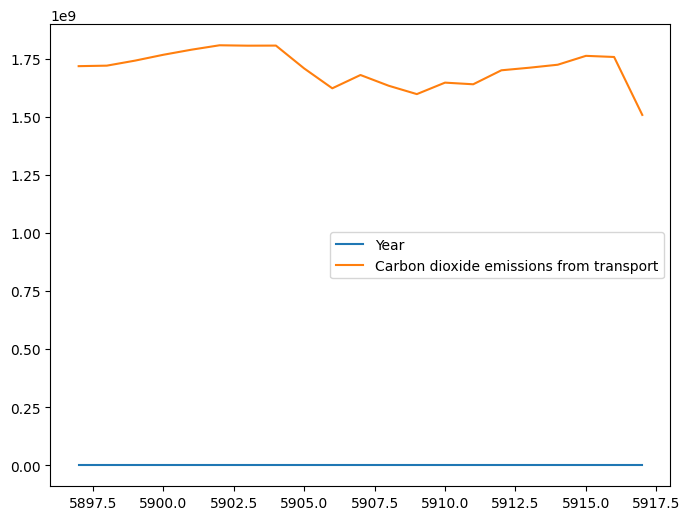

In [ ]:
US.plot()

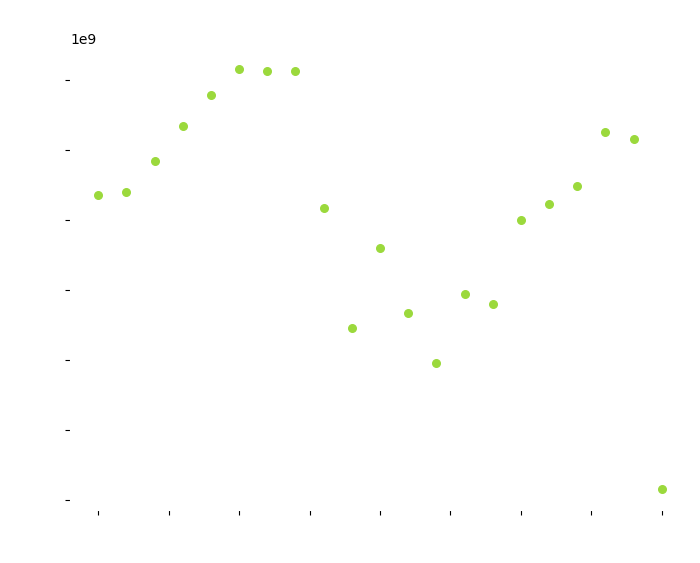

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (8.0, 6.0)
#Scatter Plot Syntax


csfont = {'fontname':'serif'}

plt.figure()
plt.scatter(US['Year'], US['Carbon dioxide emissions from transport'],
  color = '#9BD93C', s = 30)
plt.xlabel('Year',**csfont,  color = 'white')
plt.ylabel('Carbon dioxide emissions from transport',**csfont,  color = 'white')
plt.title('USA Carbon dioxide emissions from transport over time', fontsize = 15,**csfont,  color = 'white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.xticks(**csfont, color = 'white')
plt.yticks(**csfont, color = 'white')
plt.savefig('scatterplotUSA.png', transparent=True )

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Example DataFrame
data = {
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
}
df = pd.DataFrame(data)

# Sort the DataFrame by column 'B' in descending order
df_sorted = df.sort_values(by='B', ascending=False)

print(df_sorted)

   A  B  C
2  3  6  9
1  2  5  8
0  1  4  7


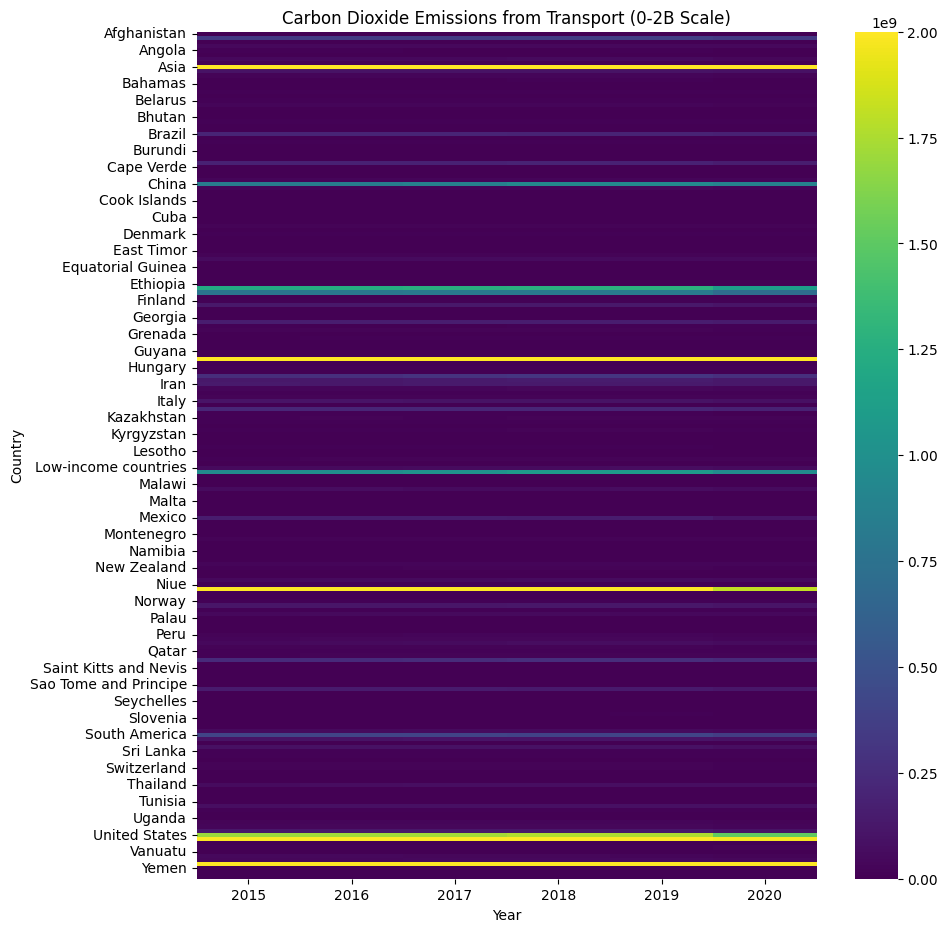

In [ ]:

transportnew = transport[transport['Year'] >= 2015]

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 11))
transport_pivot = transportnew.pivot_table(index='Entity', columns='Year', values='Carbon dioxide emissions from transport')
sns.heatmap(transport_pivot, cmap='viridis', vmin=0, vmax=2e9)  # 2e9 represents 2 billion
plt.title('Carbon Dioxide Emissions from Transport (0-2B Scale)')
plt.xlabel('Year')
plt.ylabel('Country', color = 'white')
plt.savefig('carbon_dioxide_emissions_from_transport.png', transparent=True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
total_emissions = transportnew.groupby('Entity')['Carbon dioxide emissions from transport'].sum()
top_50_emitters = total_emissions.nlargest(50).index
transport_top50 = transportnew[transportnew['Entity'].isin(top_50_emitters)]

In [ ]:
transport_top50.head()

,Entity,Carbon dioxide emissions from transport
1,Africa,5.512570e+09
3,Algeria,6.903000e+08
6,Argentina,8.895300e+08
8,Asia,3.979727e+10
9,Australia,1.824420e+09


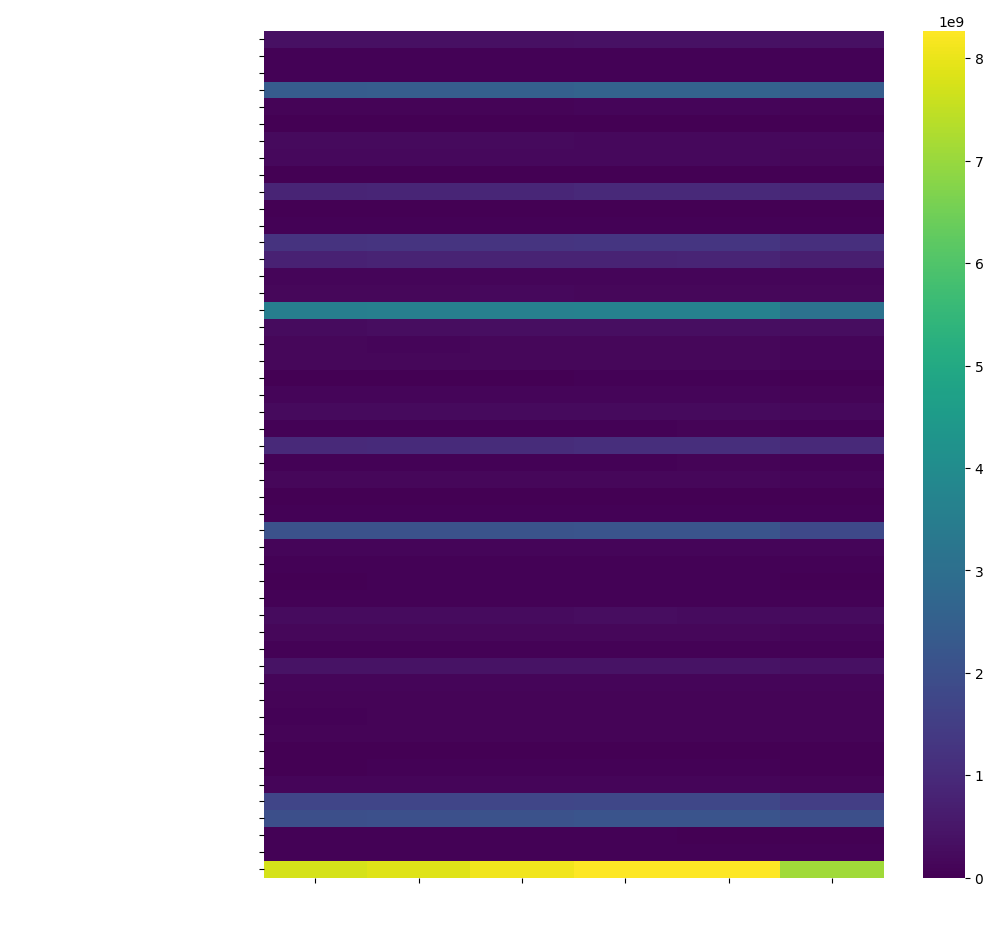

In [ ]:

transport_pivot_top50 = transport_top50.pivot_table(index='Entity', columns='Year', values='Carbon dioxide emissions from transport')
plt.figure(figsize=(10, 11))
sns.heatmap(transport_pivot_top50, cmap='viridis', vmin=0)
plt.title('Carbon Dioxide Emissions from Transport (Top 50 Emitters)', color = 'white', **csfont)
plt.xlabel('Year', color = 'white', **csfont)
plt.ylabel('Country', color = 'white', **csfont)
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.xticks(**csfont, color = 'white')
plt.yticks(**csfont, color = 'white')


plt.savefig('carbon_dioxide_emissions_from_transportNEW.png', transparent=True, bbox_inches="tight")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
# Calculate total emissions for each country

# Sort the countries by total emissions in descending order
total_emissions = transportnew.groupby('Entity')['Carbon dioxide emissions from transport'].sum()
top_50_emitters = total_emissions.nlargest(50).index
transport_top50 = transportnew[transportnew['Entity'].isin(top_50_emitters)]

# Create pivot table
transport_pivot_top50 = transport_top50.pivot_table(index='Entity', columns='Year', values='Carbon dioxide emissions from transport')

# Plot heatmap
csfont = {'fontname':'serif'}


plt.figure(figsize=(10, 11))
sns.heatmap(transport_pivot_top50, cmap='viridis', vmin=0, vmax=2e9)
plt.title('Carbon Dioxide Emissions from Transport (Top 50 Emitters)',**csfont)
plt.xlabel('Year',**csfont)
plt.ylabel('Country',**csfont)
plt.savefig('carbon_dioxide_emissions_from_transportNEW.png', transparent=True, bbox_inches="tight")
plt.show()


KeyError: 'Year'